<a href="https://colab.research.google.com/github/aaronsang/mastery-playground/blob/master/MNIST_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST - Guided Project - Deep Learning w/ Python 2.0

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
# load mnist dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [50]:
print(train_images.ndim) # Now a Rank-2 Tensor, has 2 axes (rows and columns), originally a 3D tensor
print(train_images.shape) # Modified from re-shaping, original was (60000, 28, 28) 60000 matrices, with 28 rows and 28 columns
print(train_images.dtype) # data type the tensor contains, prior to pre-processing was uint8

2
(60000, 784)
float32


In [10]:
len(train_labels)

60000

In [14]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [17]:
# Building the neural network
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
                           layers.Dense(512, activation='relu'), 
                           layers.Dense(10, activation='softmax')])

In [22]:
# Compile
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Re-shaping/pre-processing data
train_images = train_images.reshape((60000, 28 *28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 *28))
test_images = test_images.astype('float32') / 255

In [23]:
# Train the model!
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2549 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9699
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0501 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9886


In [36]:
# Test the model
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0] # A representation of a number

[8.3505852e-10 5.1370637e-11 7.9095508e-07 4.9737914e-06 7.0832858e-12
 1.1081260e-07 8.5344998e-15 9.9999368e-01 1.5185966e-08 4.9168034e-07]


In [28]:
# Using argmax to determine which of the 10 digits the test image most likely is
predictions[0].argmax()

7

In [34]:
# Choosing the probability of the digit 7
predictions[0][7]

0.9999937

In [35]:
# Verifying via the label what digit this image is
test_labels[0]

7

In [43]:
# Validating test sample at index 5
print(predictions[5].argmax())
print(test_labels[5])

1
1


In [44]:
# Evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9802
test_acc: 0.9801999926567078


---

## **Breaking down the guided project**

In [55]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [57]:
print(train_images.ndim) # 3D tensor
print(train_images.shape) # (60000, 28, 28) 60000 matrices, with 28 rows and 28 columns
print(train_images.dtype) # uint8

3
(60000, 28, 28)
uint8


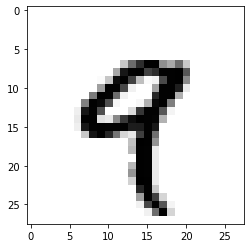

The image at index 4/above is: 9


In [62]:
# Visualizing a sample
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(f'The image at index 4/above is: {train_labels[4]}')

---

### Learning tensor slicing

In [56]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)
